In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re


In [ ]:
# Install required libraries (run this cell in Colab)
!pip install nltk wordcloud scikit-learn matplotlib

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Download NLTK stopwords (run once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Sample health-related paragraph (you can replace this with your own text)
health_text = """
According to Article 14 of the Indian Constitution, the State shall not deny to any person equality before the law or the equal protection of the laws within the territory of India. This fundamental right is enforceable by the courts and forms the cornerstone of the legal framework that governs civil liberties. Any law that arbitrarily discriminates between individuals or groups can be struck down as unconstitutional. Moreover, the judiciary plays a pivotal role in interpreting statutes and ensuring that legislative actions comply with the principles of natural justice and due process.
"""

In [ ]:
# Step 0: Detect domain using zero-shot classification
candidate_labels = ["health", "sports", "finance", "technology", "politics", "education" , "law"]
classification_result = classifier(health_text, candidate_labels)
predicted_domain = classification_result['labels'][0]
confidence_score = classification_result['scores'][0]

print(f"Predicted domain: {predicted_domain} (confidence: {confidence_score:.4f})")


Predicted domain: law (confidence: 0.7990)


In [ ]:

# Step 1: Stopword Removal
stop_words = set(stopwords.words('english'))

# Simple tokenization and stopword filtering
tokens = [word for word in health_text.lower().split() if word.isalpha() and word not in stop_words]

print(f"Tokens after stopword removal:\n{tokens}\n")

Tokens after stopword removal:
['according', 'article', 'indian', 'state', 'shall', 'deny', 'person', 'equality', 'law', 'equal', 'protection', 'laws', 'within', 'territory', 'fundamental', 'right', 'enforceable', 'courts', 'forms', 'cornerstone', 'legal', 'framework', 'governs', 'civil', 'law', 'arbitrarily', 'discriminates', 'individuals', 'groups', 'struck', 'judiciary', 'plays', 'pivotal', 'role', 'interpreting', 'statutes', 'ensuring', 'legislative', 'actions', 'comply', 'principles', 'natural', 'justice', 'due']



In [ ]:
# Step 2: Keyword Counting using CountVectorizer (ignore stopwords)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([health_text])
keyword_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

print("Keyword counts:")
for word, count in keyword_counts.items():
    print(f"{word}: {count}")


Keyword counts:
14: 1
according: 1
actions: 1
arbitrarily: 1
article: 1
civil: 1
comply: 1
constitution: 1
cornerstone: 1
courts: 1
deny: 1
discriminates: 1
enforceable: 1
ensuring: 1
equal: 1
equality: 1
forms: 1
framework: 1
fundamental: 1
governs: 1
groups: 1
india: 1
indian: 1
individuals: 1
interpreting: 1
judiciary: 1
justice: 1
law: 2
laws: 1
legal: 1
legislative: 1
liberties: 1
natural: 1
person: 1
pivotal: 1
plays: 1
principles: 1
process: 1
protection: 1
right: 1
role: 1
shall: 1
state: 1
statutes: 1
struck: 1
territory: 1
unconstitutional: 1


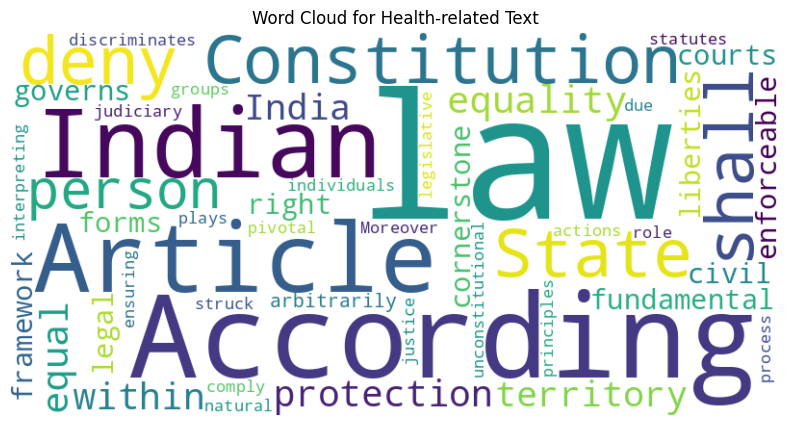

In [ ]:
# Step 3: Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(health_text)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Health-related Text")
plt.show()